# Cartoon_classification_extracting_important_features

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

### Extracting pixels from images

In [2]:
## uploading the data to drive and to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzipping the cartoon folder
path = '/content/drive/MyDrive/cartoon.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [6]:
## adding all the images in the cartoon folder in a list using os.path and os.listdir function
directory = '/content/cartoon'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/cartoon/.DS_Store', '/content/cartoon/bart1.bmp', '/content/cartoon/bart10.bmp', '/content/cartoon/bart100.bmp', '/content/cartoon/bart101.bmp', '/content/cartoon/bart102.bmp', '/content/cartoon/bart103.bmp', '/content/cartoon/bart104.bmp', '/content/cartoon/bart105.bmp', '/content/cartoon/bart106.bmp', '/content/cartoon/bart108.bmp', '/content/cartoon/bart109.bmp', '/content/cartoon/bart11.bmp', '/content/cartoon/bart110.bmp', '/content/cartoon/bart111.bmp', '/content/cartoon/bart112.bmp', '/content/cartoon/bart113.bmp', '/content/cartoon/bart114.bmp', '/content/cartoon/bart115.bmp', '/content/cartoon/bart116.bmp', '/content/cartoon/bart117.bmp', '/content/cartoon/bart118.bmp', '/content/cartoon/bart119.bmp', '/content/cartoon/bart12.bmp', '/content/cartoon/bart120.bmp', '/content/cartoon/bart121.bmp', '/content/cartoon/bart122.bmp', '/content/cartoon/bart123.bmp', '/content/cartoon/bart124.bmp', '/content/cartoon/bart125.bmp', '/content/cartoon/bart126.bmp', '/content/cart

## Extracting Important Features

### Feature extractor

In [7]:
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/cartoon/.DS_Store', '/content/cartoon/bart1.bmp', '/content/cartoon/bart10.bmp', '/content/cartoon/bart100.bmp', '/content/cartoon/bart101.bmp', '/content/cartoon/bart102.bmp', '/content/cartoon/bart103.bmp', '/content/cartoon/bart104.bmp', '/content/cartoon/bart105.bmp', '/content/cartoon/bart106.bmp', '/content/cartoon/bart108.bmp', '/content/cartoon/bart109.bmp', '/content/cartoon/bart11.bmp', '/content/cartoon/bart110.bmp', '/content/cartoon/bart111.bmp', '/content/cartoon/bart112.bmp', '/content/cartoon/bart113.bmp', '/content/cartoon/bart114.bmp', '/content/cartoon/bart115.bmp', '/content/cartoon/bart116.bmp', '/content/cartoon/bart117.bmp', '/content/cartoon/bart118.bmp', '/content/cartoon/bart119.bmp', '/content/cartoon/bart12.bmp', '/content/cartoon/bart120.bmp', '/content/cartoon/bart121.bmp', '/content/cartoon/bart122.bmp', '/content/cartoon/bart123.bmp', '/content/cartoon/bart124.bmp', '/content/cartoon/bart125.bmp', '/content/cartoon/bart126.bmp', '/content/cart

In [8]:
## Homer --> mouth,pants,shoes,tshirt and Bart--> shorts,sneakers,class
export = 'mouth,pants,shoes,tshirt,shorts,sneakers,class\n'

In [9]:
show_images = False
features = []

In [10]:
for image_path in files:
  print(image_path)

/content/cartoon/.DS_Store
/content/cartoon/bart1.bmp
/content/cartoon/bart10.bmp
/content/cartoon/bart100.bmp
/content/cartoon/bart101.bmp
/content/cartoon/bart102.bmp
/content/cartoon/bart103.bmp
/content/cartoon/bart104.bmp
/content/cartoon/bart105.bmp
/content/cartoon/bart106.bmp
/content/cartoon/bart108.bmp
/content/cartoon/bart109.bmp
/content/cartoon/bart11.bmp
/content/cartoon/bart110.bmp
/content/cartoon/bart111.bmp
/content/cartoon/bart112.bmp
/content/cartoon/bart113.bmp
/content/cartoon/bart114.bmp
/content/cartoon/bart115.bmp
/content/cartoon/bart116.bmp
/content/cartoon/bart117.bmp
/content/cartoon/bart118.bmp
/content/cartoon/bart119.bmp
/content/cartoon/bart12.bmp
/content/cartoon/bart120.bmp
/content/cartoon/bart121.bmp
/content/cartoon/bart122.bmp
/content/cartoon/bart123.bmp
/content/cartoon/bart124.bmp
/content/cartoon/bart125.bmp
/content/cartoon/bart126.bmp
/content/cartoon/bart127.bmp
/content/cartoon/bart128.bmp
/content/cartoon/bart13.bmp
/content/cartoon/bart1

In [ ]:
100 * 200

20000

In [ ]:
(2000 / 20000) * 100

10.0

In [ ]:
100 / 2

50.0

In [10]:
for image_path in files:
  #print(image_path)
  try:
    original_image = cv2.imread(image_path)
    (H, W) = original_image.shape[:2]
  except:
    continue

  image = original_image.copy()
  image_features = []
  mouth = pants = shoes = 0
  tshirt = shorts = sneakers = 0

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  for height in range(0, H):
    for width in range(0, W):
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer - brown mouth
      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]
        mouth += 1

      # Homer - blue pants
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (H / 2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Bart - orange t-shirt
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 128]
        tshirt += 1

      # Bart - blue shorts
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Bart - blue sneakers
      if height > (H / 2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1

  mouth = round((mouth / (H * W)) * 100, 9)
  pants = round((pants / (H * W)) * 100, 9)
  shoes = round((shoes / (H * W)) * 100, 9)

  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)

  features.append(image_features)

  #print('Homer mouth: %s - Homer pants: %s - Homer shoes: %s' % (image_features[0], image_features[1], image_features[2]))
  #print('Bart t-shirt: %s - Bart shorts: %s - Bart sneakers: %s' % (image_features[3], image_features[4], image_features[5]))

  f = (",".join([str(item) for item in image_features]))
  export += f + '\n'

  if show_images == True:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fig, im = plt.subplots(1, 2)
    im[0].axis('off')
    im[0].imshow(original_image)
    im[1].axis('off')
    im[1].imshow(image)
    plt.show()

In [11]:
export

'mouth,pants,shoes,tshirt,shorts,sneakers,class\n0.0,0.0,0.114799225,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.11007847,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.182518631,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.053304904,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.019853369,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.08757526,10.443349754,3.183296307,3.183296307,0\n0.0,0.0,0.043806812,9.497408

In [12]:
with open('features.csv', 'w') as file:
  for l in export:
    file.write(l)
file.closed

True

In [13]:
dataset = pd.read_csv('features.csv')
dataset

,mouth,pants,shoes,tshirt,shorts,sneakers,class
0,0.000000,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.000000,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.000000,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.171985,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.000000,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.000000,1


### Train and test sets

In [14]:
X = dataset.iloc[:, 0:6].values
X

array([[ 0.        ,  0.        ,  0.11479923,  6.88610189,  3.49520435,
         3.49520435],
       [ 0.        ,  0.        ,  0.11007847,  5.00490111,  3.18388871,
         3.18388871],
       [ 0.        ,  0.        ,  0.18251863,  5.26462044,  5.02968296,
         5.02968296],
       ...,
       [ 4.26497522,  0.        ,  0.32993967,  0.        ,  0.        ,
         0.        ],
       [ 1.42913348,  0.        ,  0.03455866,  0.        ,  0.        ,
         0.        ],
       [ 0.853902  , 13.74424774,  0.16177802,  0.        ,  0.        ,
         0.        ]])

In [15]:
y = dataset.iloc[:, 6].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [17]:
X_train.shape, y_train.shape

((215, 6), (215,))

In [18]:
X_test.shape, y_test.shape

((54, 6), (54,))

### Building and training the neural network

In [ ]:
(6 + 2) / 2

4.0

In [20]:
# 6 -> 4 -> 4 -> 4 -> 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))
model.add(tf.keras.layers.Dense(units = 4, activation='relu'))
model.add(tf.keras.layers.Dense(units = 4, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
7/7 [==============================] - 8s 5ms/step - loss: 0.5026 - accuracy: 0.8930
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4711 - accuracy: 0.8651
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4489 - accuracy: 0.8558
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4308 - accuracy: 0.8605
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4156 - accuracy: 0.8744
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8744
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.3877 - accuracy: 0.8744
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8837
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.8884
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8837
Epoch 11/50
7/7 [======================

### Evaluating the neural network

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

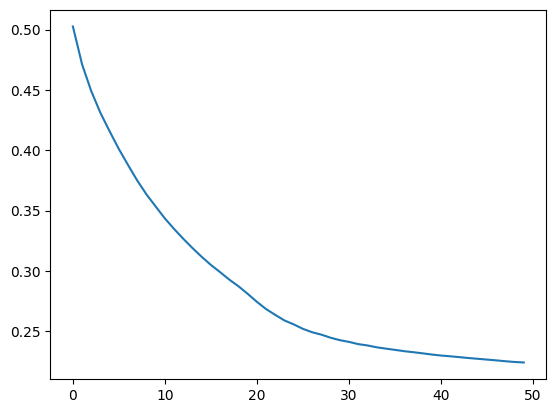

In [25]:
plt.plot(history.history['loss']);

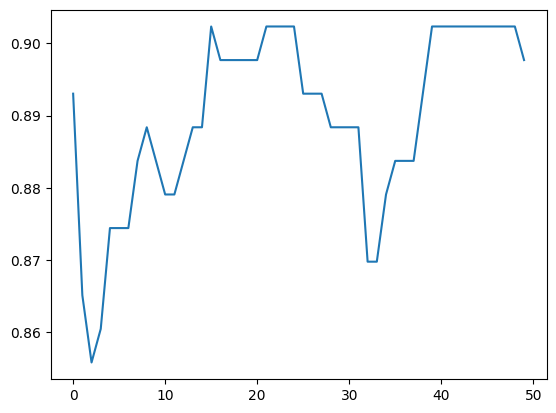

In [26]:
plt.plot(history.history['accuracy']);

In [27]:
X_test.shape

(54, 6)

In [28]:
predictions = model.predict(X_test)
predictions

2/2 [==============================] - 0s 11ms/step


array([[7.23779749e-06],
       [9.83496308e-01],
       [2.95949206e-02],
       [4.60181087e-01],
       [3.70054170e-02],
       [9.91026580e-01],
       [2.79228721e-06],
       [1.11975800e-02],
       [2.92851776e-03],
       [5.06489491e-03],
       [3.97499055e-02],
       [9.99973178e-01],
       [8.38114023e-01],
       [2.13664971e-05],
       [4.48177695e-01],
       [9.99951839e-01],
       [6.50338471e-01],
       [9.96930420e-01],
       [4.44762528e-01],
       [1.54826138e-02],
       [2.08658958e-11],
       [9.98793960e-01],
       [9.79737103e-01],
       [5.28012868e-04],
       [1.24556764e-05],
       [9.99752820e-01],
       [5.71707010e-01],
       [5.86959068e-03],
       [9.81949866e-01],
       [9.99963880e-01],
       [9.71487045e-01],
       [9.99999642e-01],
       [9.99903560e-01],
       [5.94954550e-01],
       [9.99998808e-01],
       [9.74066257e-01],
       [4.95429570e-03],
       [1.28289955e-02],
       [4.51705396e-01],
       [4.15786430e-02],


In [29]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [30]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions) # 0.68

0.9259259259259259

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[26,  2],
       [ 2, 24]])

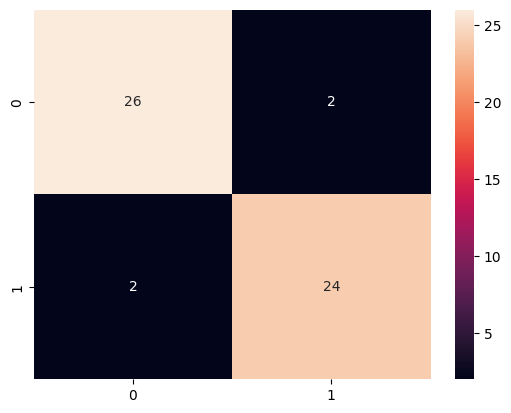

In [33]:
sns.heatmap(cm, annot=True);

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.92      0.92      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



### Saving, loading and classifying one single image

In [35]:
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)

In [36]:
from keras.models import save_model
network2_saved = save_model(model, '/content/cartoon_feature_weights.hdf5')

<ipython-input-36-a5f324d7476e>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network2_saved = save_model(model, '/content/cartoon_feature_weights.hdf5')


In [37]:
with open('model.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 6], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_4_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 6], "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 6]}}, {"module": "keras.layers", "class_name": "Dense", "confi

In [39]:
model_loaded = tf.keras.models.model_from_json(json_saved_model)
model_loaded.load_weights('cartoon_feature_weights.hdf5')
model_loaded.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [40]:
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
test_image = X_test[0]
test_image

array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
       5.59913859e+00, 5.59913859e+00])

In [42]:
test_image.shape

(6,)

In [43]:
test_image = test_image.reshape(1,-1)
test_image.shape

(1, 6)

In [44]:
model_loaded.predict(test_image)[0][0]

1/1 [==============================] - 0s 55ms/step


7.23779e-06

In [45]:
if model_loaded.predict(test_image)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 25ms/step
Bart
